In [1]:
import pandas as pd

In [2]:
# csv 불러오기
funding_rounds = pd.read_csv('/Users/jb/Documents/DSL/crunchbase_1/funding_rounds.csv')
investments = pd.read_csv('/Users/jb/Documents/DSL/crunchbase_2/investments.csv')
organizations = pd.read_csv('/Users/jb/Documents/DSL/crunchbase_4/organizations.csv')

In [3]:
# 모든 column 보기
pd.set_option('display.max_columns', None)

In [4]:
# company 열 추가
funding_rounds['company'] = funding_rounds['name'].apply(lambda x : x.split(' - ')[1])

In [5]:
# investment_type list화
inv_list = list(funding_rounds['investment_type'].unique())

In [6]:
# by_series dataframe 만들기
by_series = pd.DataFrame(funding_rounds['company'].unique(), columns=['company'])

for i in inv_list:
     temp = pd.DataFrame(funding_rounds[funding_rounds['investment_type'] == '%s' % i]['company'].unique(), columns=['company'])
     temp['is_%s' % i] = 1
     by_series = pd.merge(by_series, temp, how='left', on='company')

In [16]:
by_series

,company,is_angel,is_series_a,is_series_b,is_seed,is_series_c,is_series_d,is_series_unknown,is_debt_financing,is_series_e,is_private_equity,is_series_f,is_pre_seed,is_undisclosed,is_grant,is_post_ipo_equity,is_convertible_note,is_post_ipo_debt,is_non_equity_assistance,is_corporate_round,is_series_i,is_series_g,is_secondary_market,is_post_ipo_secondary,is_initial_coin_offering,is_series_h,is_product_crowdfunding,is_equity_crowdfunding,is_series_j
0,Meta,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Photobucket,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Geni,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,StumbleUpon,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gizmoz,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256253,3S PAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256254,Fatoura by Brainiac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256255,Israa Media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256256,JustFIT.lk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# angel round 받은 금액
angel_amount = funding_rounds[funding_rounds['investment_type'] == 'angel'][['company', 'raised_amount_usd']].dropna(axis=0)
angel_amount.columns = ['company', 'angel_amount']
angel_amount = angel_amount.groupby('company').sum()
angel_amount.reset_index(level=['company'], inplace=True)

In [75]:
# seed round 받은 금액
seed_amount = funding_rounds[funding_rounds['investment_type'] == 'seed'][['company', 'raised_amount_usd']].dropna(axis=0)
seed_amount.columns = ['company', 'seed_amount']
seed_amount = seed_amount.groupby('company').sum()
seed_amount.reset_index(level=['company'], inplace=True)

In [76]:
# pre_seed round 받은 금액
pre_seed_amount = funding_rounds[funding_rounds['investment_type'] == 'pre_seed'][['company', 'raised_amount_usd']].dropna(axis=0)
pre_seed_amount.columns = ['company', 'pre_seed_amount']
pre_seed_amount = pre_seed_amount.groupby('company').sum()
pre_seed_amount.reset_index(level=['company'], inplace=True)

In [77]:
# seed dataframe 만들기
seed = pd.DataFrame(funding_rounds['company'].unique(), columns=['company'])
seed = pd.merge(seed, angel_amount, how='left', on='company')
seed = pd.merge(seed, seed_amount, how='left', on='company')
seed = pd.merge(seed, pre_seed_amount, how='left', on='company')
seed = seed.fillna(0)

In [78]:
# 초기 자금 열 만들기
seed['seed'] = seed['angel_amount'] + seed['seed_amount'] + seed['pre_seed_amount']

In [79]:
# Series A 투자를 받았는지 여부 열 만들기
series_a = pd.DataFrame(funding_rounds[funding_rounds['investment_type'] == 'series_a']['company'].unique(), columns=['company'])
series_a['is_series_a'] = 1
seed = pd.merge(seed, series_a, how='left', on='company')
seed = seed.fillna(0)

In [85]:
# seed가 0인 행 제거
seed.drop(seed[seed['seed'] == 0].index, inplace=True)

In [88]:
# Series A 투자 여부에 따른 초기 자금의 평균
seed.groupby('is_series_a').mean()['seed']

is_series_a
0.0    1.502990e+06
1.0    2.797091e+06
Name: seed, dtype: float64

In [97]:
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

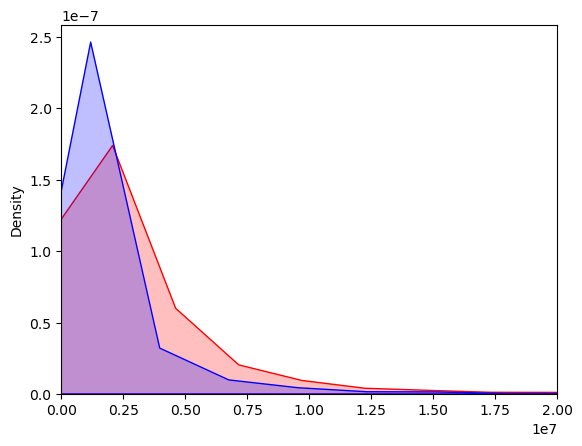

In [109]:
# 정규성 검정
series_a_amount = seed[seed['is_series_a'] == 1]['seed'].values.tolist()
no_series_a_amount = seed[seed['is_series_a'] == 0]['seed'].values.tolist()

sns.kdeplot(data=series_a_amount, color='red', shade=True)
sns.kdeplot(data=no_series_a_amount, color='blue', shade=True)
plt.xlim([0, 2e+7])
plt.show()

In [110]:
# 등분산 검정
print(stats.levene(series_a_amount, no_series_a_amount))

LeveneResult(statistic=338.9903478251322, pvalue=1.416380040506384e-75)


In [111]:
# t-test
t_stat, p_value = stats.ttest_ind(series_a_amount, no_series_a_amount, equal_var=True, alternative="two-sided")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 28.638540347636038, p-value : 1.210066962449237e-179


In [ ]:
# series a 투자 유치 여부에 따라 구분한 그룹의 초기 투자 자본금 평균이 유의미하게 차이남